# 텍스트 전처리(한글)
- KoNLPy 패키지 이용

## 패키지 다운로드
- 윈도우에서 미리 설정해야 할 것
 - pip install JPype1 (윈도우에서만 필요)
 - 자바 다운로드: https://www.oracle.com/java/technologies/javase-jdk14-downloads.html
 - 자바 환경변수: https://zetawiki.com/wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_JAVA_HOME_%ED%99%98%EA%B2%BD%EB%B3%80%EC%88%98_%EC%84%A4%EC%A0%95
- pip install --user konlpy

## KoNLPy
- 샘플 말뭉치
 - kolaw: 헌법 말뭉치
 - kobill: 법안 말뭉치
- 한글 형태소 분석기
 - 다양한 형태소 분석, 태깅 라이브러리를 모아놓은 것.
 - Hannanum: 한나눔. kaist
 - Kkma: 꼬꼬마. 서울대학교 IDS연구실
 - Komaran: 코모란
 - Mecab: 메카브. 일본어용. 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 트위터 형태소 분석기
- 형태소 분석기 공통 methods
 - nouns: 명사 추출
 - morphs: 형태소 추출
 - pos: 품사 부착

In [2]:
#헌법 말뭉치
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [4]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


In [5]:
#법안 말뭉치
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [7]:
d = kobill.open('1809890.txt').read()
print(d[:200])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 


In [8]:
#형태소 분석기 생성
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()
#속도는 OKT가 좋고, 성능면에서는 hannanum이나 kkma가 낫다.

## 명사 추출

In [9]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [10]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [11]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

## 형태소 추출
- morphs method 이용

In [13]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

## 품사 부착
- pos 명령 사용하여 품사 부착
- 형태소분석기마다 품사 태그가 다르므로 각 형태소분석기에 대한 문서 참조
- 부착되는 품사 태그의 기호의 의미는 tagset 속성으로 확인

In [14]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [15]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

## 빈도 분석
- NLTK 기능 사용하여 한국어 빈도 분석

In [18]:
#한글폰트 사용
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

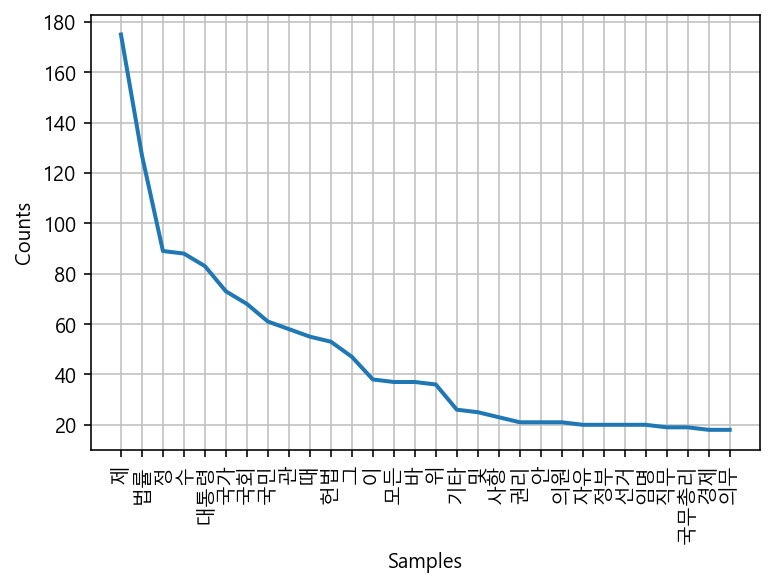

In [19]:
from nltk import Text
from matplotlib import pyplot as plt

kolaw = Text(okt.nouns(c))
kolaw.plot(30)

plt.show()
#헌법 전체에서 명사를 뽑았고, 어떤 명사가 많이 쓰였는지 보았다.

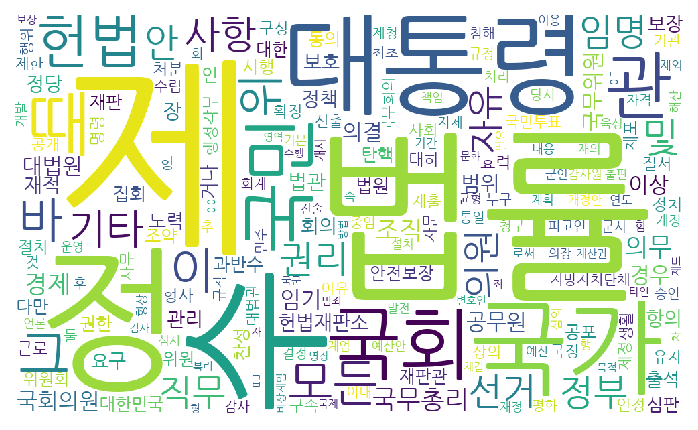

In [22]:
from wordcloud import WordCloud

#한글 TTF 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()